In [1]:
from fenics import *
from dolfin import *
from mshr import *

In [17]:
# create Mesh
domain1 = Circle(Point(0, 0), 1.5)
domain2 = Circle(Point(0, 0), 3)
domain = domain2 - domain1
mesh = generate_mesh(domain, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh, 'P', 1)

In [18]:
# Define boundry condition
#V_D = Expression('0.5 + x[0]',degree=1)
#r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
#theta = Expression("atan2(x[1],x[0])", degree=1)
#V_O = Expression("1/r",r=r,t=theta, degree=2)
#V_I = Expression("15",r=1.5,t=theta, degree=2)
#def boundry(r, on_boundry):
#    return on_boundry

#bc1 = DirichletBC(X, V_O, boundry)
#bc2 = DirichletBC(X, V_I, boundry)
#bc = [bc2,bc1]

In [19]:
r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 3-tol

def inner_boundary(x, on_boundary):
    return on_boundary and (sqrt(x[0]*x[0]+x[1]*x[1])<1.5 + tol)

bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary)]

In [20]:
# Define variational proble
V = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V), grad(v))*dx
L = rho*v*dx

In [21]:
# Compute solution
V = Function(X)
solve(a == L, V, bc)

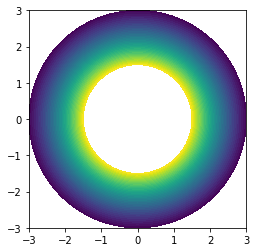

In [22]:
plot(V)

In [23]:
vtkfile_V = File('poisson/voltage.pvd')
vtkfile_V << V